In [142]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import random
import numpy as np
import pandas as pd
import os
from scipy.integrate import odeint

In [143]:
def polygon_under_graph(xlist, ylist):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    """
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]

# SIS MAIN

In [155]:
main_path  = os.getcwd()
N=100
mu1,mu2 = int(N*.5), int(N*.5)
s1,s2 = int(N*.1), int(N*.1)
datafolder_path = main_path+"/data_sis_v0/%d_%d_%d_%d_%d/CME/" %(N,mu1,mu2,s1,s2)

In [156]:
data_dfs = []
for filename in os.listdir(datafolder_path):
    if filename.endswith(".csv") and filename[0].isdigit():
        data_dfs.append([float(filename.split(".csv")[0]),pd.read_csv(datafolder_path+filename,header=None,)])
        
def sortSecond(val): 
    return val[0] 
        
data_dfs.sort(key =sortSecond )  #sort by increasing c3



In [157]:
#data_dfs[0][0]# r0
#data_dfs[0][1]# last configurations

In [158]:
r0s = []
for i in range(0,len(data_dfs)):
    r0s.append(data_dfs[i][0])
len(r0s)

9

In [148]:
#ODE 
datafolder_path = main_path+"/data_sis_v0/%d_%d_%d_%d_%d/ODE/" %(N,mu1,mu2,s1,s2)
ODE_sol = []

for filename in os.listdir(datafolder_path):
    if filename.endswith(".csv") and filename[0].isdigit():
        ODE_sol.append([float(filename.split(".csv")[0]),pd.read_csv(datafolder_path+filename,header=None).iloc[-1][1:]])

ODE_sol.sort() #sort in ascending r0

for i in range(0,len(ODE_sol)): #rescale to N
    ODE_sol[i][1]= ODE_sol[i][1]*N


In [149]:
#ODE_sol[0][0]    # R0
#ODE_sol[0][1]    # S_end, I_end
#ODE_sol[0][1][1] # S_end

In [150]:
output_folder = main_path+"/data_sis_v0/%d_%d_%d_%d_%d/" %(N,mu1,mu2,s1,s2)

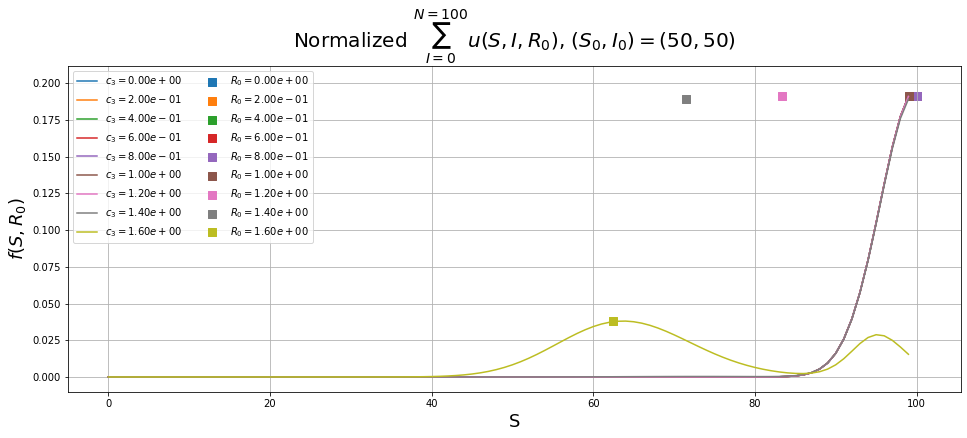

In [151]:
indices_skewness = [0,2,5,7,10,12,15,17,20,-1]
plt.figure(figsize=[16,6])
plt.grid()
for i in range(0,len(data_dfs)):
    data = data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0))
    plt.scatter(ODE_sol[i][1][1],max(data),label="$R_{0}=%.2e$"%(ODE_sol[i][0]),s=50,marker='s')
    plt.plot(data,label="$c_{3}=%.2e$"%(data_dfs[i][0]))
plt.legend(ncol=2)
plt.xlabel("S",fontsize=18)
plt.ylabel("$f(S,R_{0})$",fontsize=18)
plt.title("Normalized $\sum^{N=%d}_{I=0}u(S,I,R_{0})$, $(S_{0},I_{0})=(%d,%d)$"%(N,mu1,mu2),fontsize=20)
plt.grid(True)

plt.savefig(output_folder+"%d_%d_%d_1d.png"%(N,mu1,mu2))

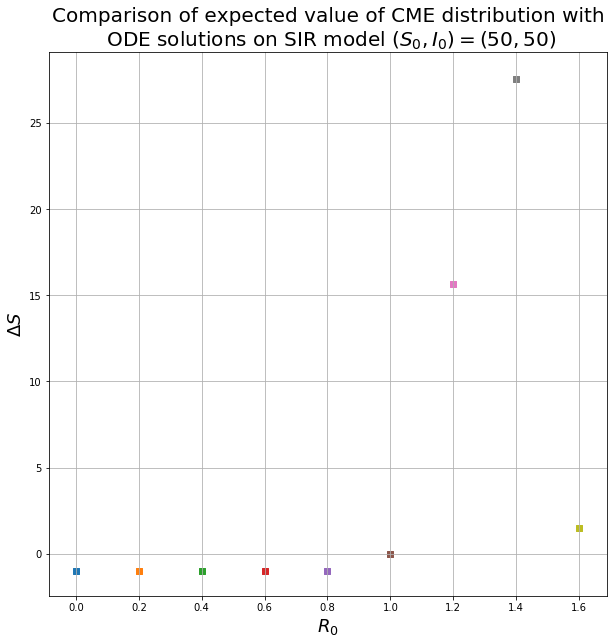

In [152]:
plt.figure(figsize=[10,10])
plt.title("Comparison of expected value of CME distribution with\n ODE solutions on SIR model $(S_{0},I_{0})=(%d,%d)$"%(mu1,mu2),fontsize=20)
plt.grid()
for i in range(0,len(data_dfs)):
    data = data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0))
    plt.scatter(ODE_sol[i][0],np.argmax(data)-ODE_sol[i][1][1],marker='s',label="$c_{3}=%.2e$"%(ODE_sol[i][0]))
plt.ylabel("$\\Delta S$",fontsize=18)
plt.xlabel("$R_{0}$",fontsize=18)
plt.savefig(output_folder+"%d_%d_%d_discrepancy.png"%(N,mu1,mu2))

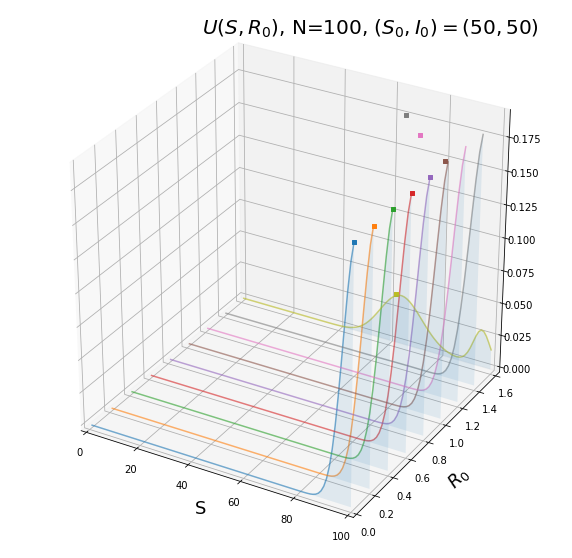

In [153]:
X = np.linspace(1,N,N)
zeros = np.full(N,0)
Y = []
Z = []
for i in range(0,len(data_dfs)):
    Y.append(np.full(N,data_dfs[i][0]))
    Z.append(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)))
    
    
plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
Zmax = 0

for i in range(0,len(data_dfs)):
    verts=[]
    verts.append(polygon_under_graph(X, Z[i]))

    poly = PolyCollection(verts, alpha=.1)
    ax.add_collection3d(poly, zs=data_dfs[i][0], zdir='y')
    ax.plot(X, Y[i], Z[i],alpha=.6)
    ax.scatter(ODE_sol[i][1][1], ODE_sol[i][0],max(Z[i]),marker='s')


    if max(Z[i])>Zmax:
        Zmax=max(Z[i])
    
    ax.set_xlabel('S',fontsize=18)
    ax.set_ylabel('$R_{0}$',fontsize=18)
    
    
ax.text2D(0.35, 0.95, '$U(S,R_{0})$, N=100, $(S_{0},I_{0})=(%d,%d)$'%(mu1,mu2),fontsize=20, transform=ax.transAxes)

ax.set_xlim(0,N)
ax.set_ylim(data_dfs[0][0]*.99,data_dfs[-1][0]*1.01)
ax.set_zlim(0,Zmax)
ax.dist = 10
ax.yaxis.labelpad=10
plt.savefig(output_folder+"%d_%d_%d_3d.png"%(N,mu1,mu2))
#ax.view_init(30, 110)

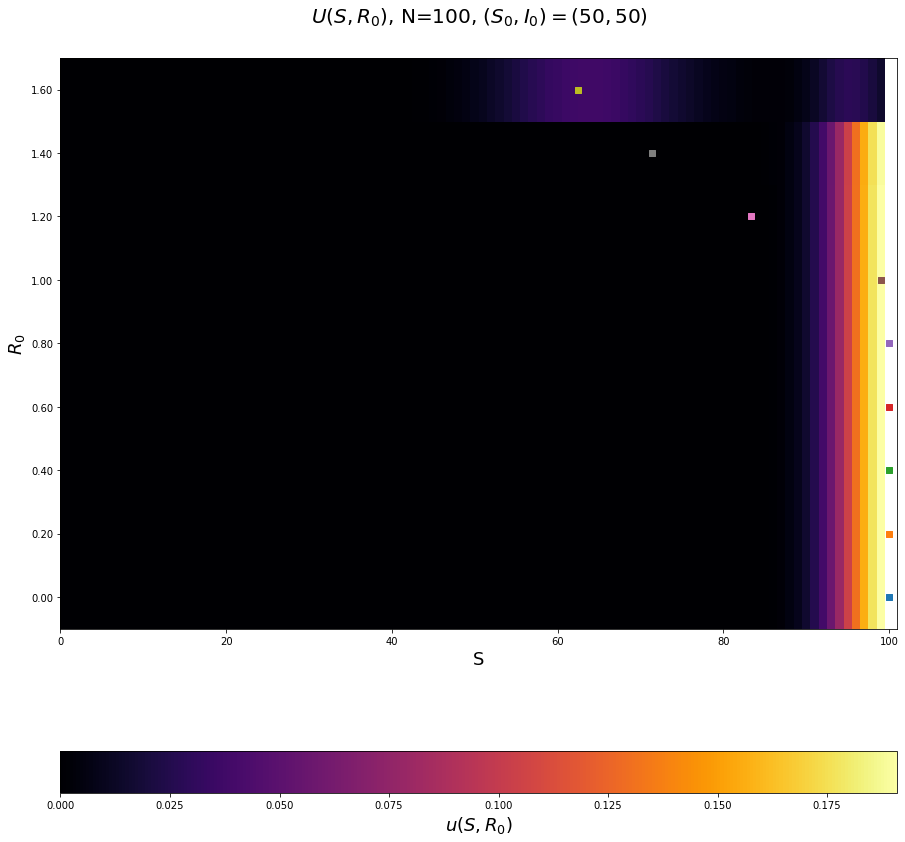

In [154]:
_z = []
_xlabels = []
_xticks = []
for i in range(0,len(data_dfs)):
    _z.append(data_dfs[i][1].sum(axis=0)/sum(data_dfs[i][1].sum(axis=0)))

for i in range(0,len(data_dfs)):
    _xlabels.append("%.2f"%(data_dfs[i][0]))
    _xticks.append(i)
fig, ax = plt.subplots(figsize=(15,15))
im = ax.matshow((_z),origin='lower',aspect='auto',cmap="inferno")
ax.set_yticks(_xticks)
ax.set_yticklabels(_xlabels,rotation=0)
ax.xaxis.set_ticks_position('bottom')
ax.set_title("$U(S, R_{0})$, N=%d, $(S_{0},I_{0})=(%d,%d)$"%(N,mu1,mu2),fontsize=20)
ax.set_ylabel("$R_{0}$",fontsize=18,rotation=90)
ax.set_xlabel("S",fontsize=18)
cbar = plt.colorbar(im,orientation='horizontal')
cbar.set_label('$u(S,R_{0})$', rotation=0,fontsize=18)
for i in range(0,len(data_dfs)):
    plt.scatter(ODE_sol[i][1][1],i,marker='s')
plt.xlim(0,N+1)
plt.savefig(output_folder+"%d_%d_%d_heatmap.png"%(N,mu1,mu2))